In [12]:
import datetime as dt
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt
from scipy.stats import norm

In [13]:
stocks = ['ADBE','CSCO','IBM','NVDA','MSFT','HPQ'] 
start_day = dt.datetime(2022, 1, 1)
end_day = dt.datetime(2022, 12, 31)

In [16]:
yfin.pdr_override()
data =  pdr.get_data_yahoo(stocks, start=start_day, end=end_day)
stock_close = data["Adj Close"]
stock_close.describe()

[*********************100%***********************]  6 of 6 completed


,ADBE,CSCO,HPQ,IBM,MSFT,NVDA
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,396.121513,46.779237,31.751633,127.312985,266.291846,185.526021
std,68.045108,5.120022,4.126646,7.825042,24.896256,46.329325
min,275.200012,38.377247,24.031578,113.230972,212.649246,112.210609
25%,338.315002,42.720175,27.788334,121.728531,245.271400,153.218529
50%,397.899994,46.196274,32.571560,125.870003,263.354340,172.077759
75%,438.675003,51.801432,35.265568,132.156830,286.404770,222.385117
max,564.369995,59.845669,38.673729,146.742050,330.092255,300.846375


Text(0.5, 1.0, 'HPQ')

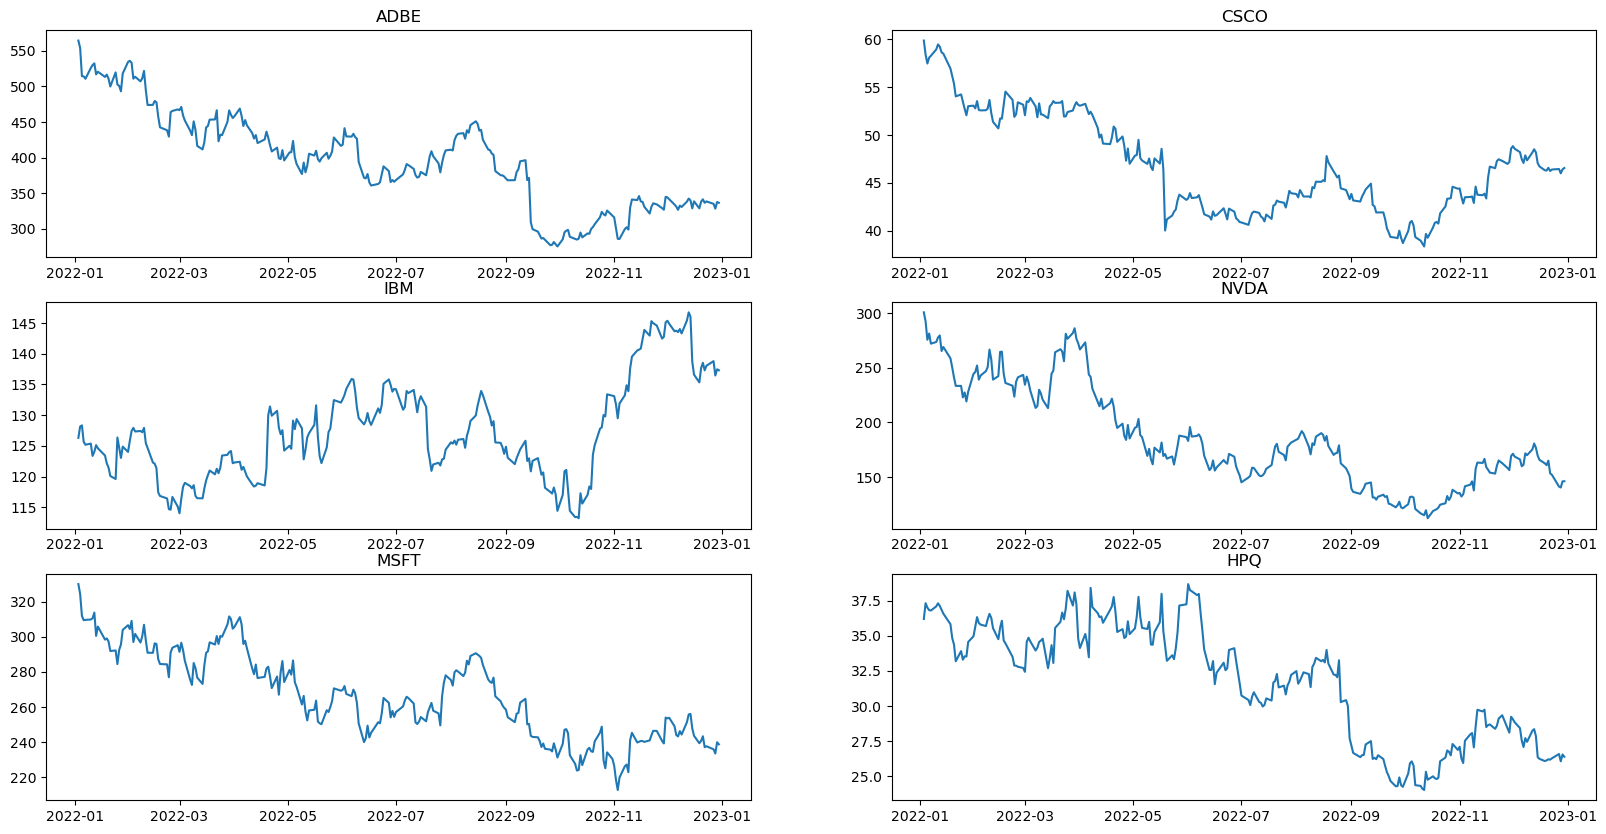

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(20,10))
axs[0, 0].plot(stock_close['ADBE'])
axs[0, 0].set_title('ADBE')
axs[0, 1].plot(stock_close['CSCO'])
axs[0, 1].set_title('CSCO')
axs[1, 0].plot(stock_close['IBM'])
axs[1, 0].set_title('IBM')
axs[1, 1].plot(stock_close['NVDA'])
axs[1, 1].set_title('NVDA')
axs[2, 0].plot(stock_close['MSFT'])
axs[2, 0].set_title('MSFT')
axs[2, 1].plot(stock_close['HPQ'])
axs[2, 1].set_title('HPQ')

In [18]:
stock_returns = stock_close.pct_change()
stock_returns.tail()

,ADBE,CSCO,HPQ,IBM,MSFT,NVDA
Date,,,,,,
2022-12-23,0.005735,0.003381,0.003751,0.005466,0.002267,-0.008671
2022-12-27,-0.009928,0.001053,0.011584,0.005436,-0.007414,-0.071353
2022-12-28,-0.020174,-0.009678,-0.019579,-0.016851,-0.010255,-0.006019
2022-12-29,0.028173,0.009135,0.018840,0.007427,0.027630,0.040396
2022-12-30,-0.003110,0.002947,-0.006287,-0.001205,-0.004938,0.000753


In [20]:
portfolio_val = 1000000000.00
confidence_interval = 0.95
mu = np.mean(stock_returns, axis=0)
sigma = np.std(stock_returns)

In [21]:
num_days = 251.
annualized_mean_ret = mu/num_days
annualized_std_ret = sigma/np.sqrt(num_days)

In [22]:
INPD = norm.ppf(1 - confidence_interval,annualized_mean_ret,annualized_std_ret)
VaR = portfolio_val*INPD

In [23]:
round_VaR = np.round_(VaR,2)

In [24]:
for i in range(len(stocks)):
    print("Value-at-Risk for", stocks[i],"is equal to ", round_VaR[i])

Value-at-Risk for ADBE is equal to  -2953605.07
Value-at-Risk for CSCO is equal to  -1918520.96
Value-at-Risk for IBM is equal to  -2760011.78
Value-at-Risk for NVDA is equal to  -1554701.92
Value-at-Risk for MSFT is equal to  -2313612.79
Value-at-Risk for HPQ is equal to  -4139323.16
